<a href="https://colab.research.google.com/github/EmAchieng/DataSciencePracticeSeries/blob/master/AppliedML_Churn_Prediction_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Q0'></a>
<center><a target="_blank" href="http://www.propulsion.academy"><img src="https://drive.google.com/uc?id=1McNxpNrSwfqu1w-QtlOmPSmfULvkkMQV" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>
<center> <h4 style="color:#303030"> Introduction to Data Science, Week 2 day 1, Guided Tutorial2: </h4> </center>
<center> <h1 style="color:#303030">Churn Prediction</h1> </center>
<p style="margin-bottom:1cm;"></p>
<center style="color:#303030"><h4>Propulsion Academy, 2021</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm">
        <p><strong>Goal:</strong> Practice an end-to-end binary classification task on the data set of a telecommunication Company</p>
        <strong> Sections:</strong>
        <a id="P0" name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href="#I">Introduction </a> </li>
            <li> <a style="color:#303030" href="#SU">Set Up </a> </li>
            <li> <a style="color:#303030" href="#P1">Exploratory Data Analysis</a></li>
            <li> <a style="color:#303030" href="#P2">Modeling</a></li>
            <li> <a style="color:#303030" href="#P3">Model Evaluation and Explainability</a></li>
        </ol>
        <strong>Topics Trained:</strong> Churn Prediction, Exploratory Data Analysis, Modeling, Feature Engineering, automl, SHAP, binary Classification.
    </div>
</div>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/hsg-materials/index.html" title="momentum"> SIT Introduction to Data Science</a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/hsg-materials/chapters/day2/index.html" title="momentum">Week 2 Day 1, th Python</a>|
        <a style="color:#00BAE5" href="https://colab.research.google.com/drive/1lwb7EdlE60EfxwgoQPwjSczXy-HDxqkB?usp=sharing" title="momentum"> Exercise 2, Churn Prediction</a>
</strong></nav>

<a id='I' name="I"></a>
## [Introduction](#P0)

After extensively using Pandas & Plotly for data analysis and exploration, we will further clean the data and generate features to prepare the datasets for modelling. 

The starting point is the solution of exercise 3: [Visualize your Data With Python](https://colab.research.google.com/drive/1p7VP7JTWNbTAhp4-GxKkiDtOXap4heWh?usp=sharing)


For reference:
- [tutorial on Plotly](https://colab.research.google.com/drive/1yZPzBhxA-CLKwtBF1W83MWOWXKmxKdd6?usp=sharing) as a reference and checking [Plotly documentation](https://plotly.com/python/),
- [tutorial on Pandas](https://colab.research.google.com/drive/1yyULxwmNtVvI7rBNlJiArT31MpH3MQbr?usp=sharing), and [pandas documentation](https://pandas.pydata.org/docs/reference/index.html).



<a id='SU' name="SU"></a>
## [Set up](#P0)

Let's start with auto-sklearn, our library for automated machine learning.

Please note you **need to restart the run after the installation** for it to take effect!

In [ ]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

In [ ]:
!pip install pipelineprofiler

In [ ]:
!pip install shap

In [ ]:
!pip install --upgrade plotly

In [ ]:
!pip3 install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import plotly
plotly.__version__

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import autosklearn.classification
import PipelineProfiler

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [ ]:
import shap

Connect to your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/Introduction2DataScience/data/"

In [ ]:
pd.set_option('display.max_rows', 20)

In [ ]:
set_config(display='diagram')

In [ ]:
%matplotlib inline

the Dataset is downloadable [here](https://drive.google.com/file/d/1jpJ3fYxjjqy8guIL4jxxkZ9t9h9doP_q/view?usp=sharing)

add it to your google Drive, within the folder Introduction2DataScience/data that you created for the course.

<a id='P1' name="P1"></a>
## [Exploratory Data Analysis](#P0)


### Understand the Context

**What type of problem are we trying to solve?**

With this data set, we want to explore the relationship between customer behavior and characteristics, and their churn. The end goal would be to answer the following question:

**_From the customer data, can we predict churn?_**

This would allow us to target retention efforts and marketing campaigns, for example.

**How was the data collected?/ Is there documentation on the Data?**

A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

Data Description
7043 observations with 21 variables

- **CustomerID**: A unique ID that identifies each customer.
- **Gender**: The customer’s gender: Male, Female
- **Senior Citizen**: Indicates if the customer is 65 or older: Yes, No
- **Partner**: Indicate if the customer has a partner: Yes, No
- **Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- **Tenure Months**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- **Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No
- **Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- **Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- **Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- **Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- **Device Protection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- **Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- **Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- **Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No
- **Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- **Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.
- **Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- **Churn**: Yes = the customer left the company this quarter. No = the customer remained with the company.



**Has there already been Machine Learning projects on this data?**

This is a simplified version of an open dataset, made available by [IBM](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113). There has been numerous Machine Learning projects aimed at predicting churn with this dataset.

**Do we have assumption about the data?**

The categories are listed in the dataset description, we should check that we indeed have the categories in the database

**Can we foresee any challenge related to this data set?**

None

### Data Structure and types

**Load the csv file as a DataFrame using Pandas**

In [ ]:
telco = pd.read_csv(f'{data_path}TelcoChurn.csv')

**How many columns and rows do we have?**

In [ ]:
telco.shape

(7043, 21)

**What are the names and meaning of each columns?**

In [ ]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

print the first 10 rows of the dataframe

In [ ]:
telco.head(10)

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes
5  9305-CDSKC  Female              0  ...          99.65        820.5    Yes
6  1452-KIOVK    Male              0  ...          89.10       1949.4     No
7  6713-OKOMC  Female              0  ...          29.75        301.9     No
8  7892-POOKP  Female              0  ...         104.80      3046.05    Yes
9  6388-TABGU    Male              0  ...          56.15      3487.95     No

[10 rows x 21 columns]

**What are the types of each column?**

In [ ]:
print(telco.dtypes.to_string())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object


**Do the types correspond to what you expected?
if not, which columns would you change and why?**

- TotalCharges should be a float!

- we have different types for the categorical variables: SeniorCitizen is an integer, while the rest is of type 'Object'. let's keep an eye on that!

**Perform the necessary type transformations**

In [ ]:
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

**What are the possible categories for categorical columns?/What is the min, max and mean of each numerical columns?**

Let's answer these questions by using the describe method on all columns:

In [ ]:
telco.describe(include='all',datetime_is_numeric=True)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


customerID gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
count         7043   7043    7043.000000  ...    7043.000000  7032.000000   7043
unique        7043      2            NaN  ...            NaN          NaN      2
top     5061-PBXFW   Male            NaN  ...            NaN          NaN     No
freq             1   3555            NaN  ...            NaN          NaN   5174
mean           NaN    NaN       0.162147  ...      64.761692  2283.300441    NaN
std            NaN    NaN       0.368612  ...      30.090047  2266.771362    NaN
min            NaN    NaN       0.000000  ...      18.250000    18.800000    NaN
25%            NaN    NaN       0.000000  ...      35.500000   401.450000    NaN
50%            NaN    NaN       0.000000  ...      70.350000  1397.475000    NaN
75%            NaN    NaN       0.000000  ...      89.850000  3794.737500    NaN
max            NaN    NaN       1.000000  ...     118.750000  8684.800000    NaN

[11 rows x 21 columns]

We can already see that the announced nuber of categories for some columns do not correspond to what describe prints.

let's just have a look at the categories for all columns of type object:

In [ ]:
for column in telco.select_dtypes(include=['object']):
    print(f'Column {column} has {len(telco[column].unique())} categories: {telco[column].unique()}\n')

Column customerID has 7043 categories: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column gender has 2 categories: ['Female' 'Male']

Column Partner has 2 categories: ['Yes' 'No']

Column Dependents has 2 categories: ['No' 'Yes']

Column PhoneService has 2 categories: ['No' 'Yes']

Column MultipleLines has 3 categories: ['No phone service' 'No' 'Yes']

Column InternetService has 3 categories: ['DSL' 'Fiber optic' 'No']

Column OnlineSecurity has 3 categories: ['No' 'Yes' 'No internet service']

Column OnlineBackup has 3 categories: ['Yes' 'No' 'No internet service']

Column DeviceProtection has 3 categories: ['No' 'Yes' 'No internet service']

Column TechSupport has 3 categories: ['No' 'Yes' 'No internet service']

Column StreamingTV has 3 categories: ['No' 'Yes' 'No internet service']

Column StreamingMovies has 3 categories: ['No' 'Yes' 'No internet service']

Column Contract has 3 categories: ['Month-to-month' 'One year' 'Two year']

Column 

Let's create a list of all categorical variables, for later use:

In [ ]:
categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
              'PhoneService', 'MultipleLines',
              'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 
              'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaperlessBilling']

**Perform test/train split here**

!!! Please think about it!!! How should the data be splitted?

Here, we want to answer the following question:

**_From the customer data, can we predict churn?_**

With this dataset, we have a customer per line. Let's check again that this column contains unique identifiers:

In [ ]:
telco['customerID'].isna().value_counts()

False    7043
Name: customerID, dtype: int64

In [ ]:
telco['customerID'].duplicated().value_counts()

False    7043
Name: customerID, dtype: int64

so we indeed have unique identifiers. 

Let's have a look at the "churn" column:

In [ ]:
telco['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

we can see that we have much less churn than no churn. When performing the train-test split, let's conserve these proportions in both the train and test sets. fortunately, scikit learn makes that easy with the stratify option.

first we create a feature (X: customer characteristics) dataframe and a target (y: churn) dataframe:

In [ ]:
X, y = telco.iloc[:,:-1], telco.iloc[:,-1]

now, we can perform the split, stratifying according to the target (y) data:

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, # original dataframe to be split
                                                     y,
                                                     test_size=0.2, # proportion of the rows to put in the test set
                                                     stratify=y,
                                                     random_state=42) # for reproducibility (see explanation below)

# note: we randomly split the dataset into train and test. However, we want to 
#       make sure that the split will be the same whenever we run this notebook.
#       for this, we use the random_state argument (we could choose any number,
#       we just need to make sure that we don't change it, and the split will
#       always be the same, no matter how many times we open and close this
#       notebook).

from now on, we will use the train dataframe. let's save the train and test datasets in the data folder:

In [ ]:
X_train.to_csv(f'{data_path}TelcoXTrain.csv', index=False)

In [ ]:
y_train.to_csv(f'{data_path}TelcoyTrain.csv', index=False)

In [ ]:
X_test.to_csv(f'{data_path}TelcoXTest.csv', index=False)

In [ ]:
y_test.to_csv(f'{data_path}TelcoyTest.csv', index=False)

### Missing Values and Duplicates:

Are there some duplicate columns? rows?

Let's print again the columns:

In [ ]:
X_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

and the first rows:

In [ ]:
X_train.head()

customerID  gender  ...  MonthlyCharges TotalCharges
3738  4950-BDEUX    Male  ...           49.20      1701.65
3151  7993-NQLJE    Male  ...           75.10      1151.55
4860  7321-ZNSLA    Male  ...           40.55       590.35
3867  4922-CVPDX  Female  ...           73.50      1905.70
3810  2903-YYTBW    Male  ...           44.55        44.55

[5 rows x 20 columns]

Every column has a specific meaning, there are no duplicate columns. however, total charges and tenure will be related.

Let's check for duplicate rows:

In [ ]:
X_train.duplicated(keep=False).value_counts()

False    5634
dtype: int64

There are no duplicate rows.

**How many missing values are there in each columns?**

to answer this question, we can use the count method, which counts the number of rows that have a value (the non-missing data!): 

In [ ]:
print(X_train.count().to_string())

customerID          5634
gender              5634
SeniorCitizen       5634
Partner             5634
Dependents          5634
tenure              5634
PhoneService        5634
MultipleLines       5634
InternetService     5634
OnlineSecurity      5634
OnlineBackup        5634
DeviceProtection    5634
TechSupport         5634
StreamingTV         5634
StreamingMovies     5634
Contract            5634
PaperlessBilling    5634
PaymentMethod       5634
MonthlyCharges      5634
TotalCharges        5626


we can see that there are data missing on the column 'TotalCharges'

In [ ]:
X_train[X_train['TotalCharges'].isna()]

customerID  gender  ...  MonthlyCharges TotalCharges
6670  4075-WKNIU  Female  ...           73.35          NaN
4380  2520-SGTTA  Female  ...           20.00          NaN
3826  3213-VVOLG    Male  ...           25.35          NaN
488   4472-LVYGI  Female  ...           52.55          NaN
1082  4367-NUYAO    Male  ...           25.75          NaN
1340  1371-DWPAZ  Female  ...           56.05          NaN
6754  2775-SEFEE    Male  ...           61.90          NaN
3331  7644-OMVMY    Male  ...           19.85          NaN

[8 rows x 20 columns]

the null value of total charge seems to correspond to new customers (tenure=0). let's check:

In [ ]:
X_train[X_train['tenure']==0]

customerID  gender  ...  MonthlyCharges TotalCharges
6670  4075-WKNIU  Female  ...           73.35          NaN
4380  2520-SGTTA  Female  ...           20.00          NaN
3826  3213-VVOLG    Male  ...           25.35          NaN
488   4472-LVYGI  Female  ...           52.55          NaN
1082  4367-NUYAO    Male  ...           25.75          NaN
1340  1371-DWPAZ  Female  ...           56.05          NaN
6754  2775-SEFEE    Male  ...           61.90          NaN
3331  7644-OMVMY    Male  ...           19.85          NaN

[8 rows x 20 columns]

the 2 conditions return exactly the same set of customers. We could thus fill up the null 'total charge' rows by 0.

### Data Distribution and Outliers

**What is the distribution of numerical/categorical data?**

Let's plot histograms of all the features with the proportion of churned customers:

In [ ]:
for column in X_train:
    fig = px.histogram(X_train, x=column, color=y_train)
    fig.update_layout(width=700, height=300)
    fig.show()

fig = px.histogram(y_train, x='Churn')
fig.update_layout(width=700, height=300)
fig.show()

We can clearly see variations of the ratio of churn/non-churn for several variables. That's promissing for our churn prediction!
It looks like the churn proportion is sensibly the same for male and females. We could drop this column.

**Are there clear outliers?**

no

**Can we rule out some outliers as mistakes in the data collecting process?**

no

**How should we deal with outliers?**

Nothing to be done.

### Relationship between features (correlations)
Let's keep this section for the visualization exercise!

**What are the relationships between features (make a pairplot)? Are they linear?**

In [ ]:
X_train.corr().style.background_gradient(cmap='coolwarm')

as suspected, the total charges are highly correlated with the tenure!

Let's investigate the relationships between tenure, monthly charges and totalcharges using a 3d scatter plot, with the churned customers in red:

In [ ]:
fig = px.scatter_3d(X_train, x='tenure', y='MonthlyCharges', z='TotalCharges',
              color=y_train)
fig.update_traces(marker=dict(size=2))
fig.show()

with this plot, it is clear that the higher the monthly charges and the lower the tenure, the higher the rate of churn.

Let's have a look at the distribution of categories:

In [ ]:
fig = px.parallel_categories(X_train[['SeniorCitizen', 'PhoneService']], color=y_train=='yes')
fig.show()

**Is there risk of data leakage?**

not identified.

### Feature Creation and Combination



Let's go through the questions we need to answer in this section:

- **What kind of Scaling should we use/try?**
- **Should we transform some features?**
- **Should we drop some features?**
- **Should we combine features?**

When building Machine learning models, we need to encode categorical variables into numerical values that can be fed to a model. You have 2 possible situations:

- **the variable has ordered categories**, like small, medium, and large. in this case you would use a labelencoder/ordinal encoder to make a mapping small=0, medium=1, large=2, so that the new dataset would conserve the order of the original variable.
- **the categories of the variable do not have a natural order**, like red, green, blue. In this case, you would do one hot encoding: you create as many new columns as there are categories (-1) and each is filled with 0 and 1.

See the difference in this simple example:

In [ ]:
feature = [['small'], ['big'], ['medium'], ['small'], ['small'], ['big'], ['medium']]

In [ ]:
feature

[['small'], ['big'], ['medium'], ['small'], ['small'], ['big'], ['medium']]

In [ ]:
oe = OrdinalEncoder(categories=[['small', 'medium', 'big'],])

In [ ]:
oe.fit_transform(feature).tolist()

[[0.0], [2.0], [1.0], [0.0], [0.0], [2.0], [1.0]]

In [ ]:
ohe = OneHotEncoder()

In [ ]:
ohe.fit_transform(feature).toarray().tolist()

[[0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0]]

now let's apply this principle to the categorical variables of our dataset. Let's first estimate which columns should be kept:

In [ ]:
X_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
for column in X_train[categories]:
    print(column)
    print(X_train[column].unique())
    print('----------------------')

gender
['Male' 'Female']
----------------------
SeniorCitizen
[0 1]
----------------------
Partner
['No' 'Yes']
----------------------
Dependents
['No' 'Yes']
----------------------
PhoneService
['No' 'Yes']
----------------------
MultipleLines
['No phone service' 'No' 'Yes']
----------------------
InternetService
['DSL' 'Fiber optic' 'No']
----------------------
OnlineSecurity
['No' 'Yes' 'No internet service']
----------------------
OnlineBackup
['No' 'Yes' 'No internet service']
----------------------
DeviceProtection
['Yes' 'No' 'No internet service']
----------------------
TechSupport
['No' 'Yes' 'No internet service']
----------------------
StreamingTV
['Yes' 'No' 'No internet service']
----------------------
StreamingMovies
['Yes' 'No' 'No internet service']
----------------------
Contract
['Month-to-month' 'Two year' 'One year']
----------------------
PaperlessBilling
['No' 'Yes']
----------------------


Let's define the variables for onehotencoding:

In [ ]:
ohe_variables = ['gender', 'SeniorCitizen', 'Partner',
                 'Dependents', 'PhoneService', 'MultipleLines', 
                 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

The variables for Ordinal Encoding:

In [ ]:
oe_variables = ['Contract']
categories=['Month-to-month', 'One year', 'Two year']

And the Numerical variables:

In [ ]:
num_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']

### Conclusion: Experimental setup and  Possible Feature Transformations


Let's wrap up on the exploratory data analysis and conclude. We should now be able to answer the following questions:


- **What would be our baseline for the analysis?**
- **What kind of modelling setup should we use/try?**
- **What kind of Scaling should we use/try?**
- **If outliers, what kind of treatment should we apply?**
- **Should we transform some features?**
- **Should we drop some features?**
- **Should we combine features?**

Our problem is a binary classification problem. We could start by using the logistic regression model.

We ordered the relevant variables into 3 groups:

- oe_variables: variables to encode with the OrdinalEncoder
- ohe_variables: variables to encode with the OneHotEncoder
- num_variables: numerical variables.

The column TotalCharges contains some null values, but we saw that these rows correspond to new customers, so we can fill them by 0.

Finally, we will have to scale our numerical variables, so that each column we consider in our model has the same weight.

<a id='P2' name="P2"></a>
## [Modelling](#P0)

### Base Model

#### Pipeline Definition

In [ ]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=0)),
                                      ('scaler', StandardScaler())])

In [ ]:
ohe_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
oe_transformer = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year'],])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_variables),
        ('ohe', ohe_transformer, ohe_variables),
        ('oe', oe_transformer, oe_variables)])

In [ ]:
classification_model = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('classifier', LogisticRegression())])

In [ ]:
classification_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling']),
                                                 ('oe',
                                                  OrdinalEncoder(categories=[['Month-to-month',
                                                                              'One '
                                                                              'year',
                                                                              'Two '
                                                                              'year']]),
                                                  ['Contract'])])),
                ('classifier', LogisticRegression())])

#### Model Cross Validation

In [ ]:
cross_val_score(classification_model, X_train, y_train)

array([0.82874889, 0.80301686, 0.80212955, 0.79503106, 0.79573712])

In [ ]:
classification_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling']),
                                                 ('oe',
                                                  OrdinalEncoder(categories=[['Month-to-month',
                                                                              'One '
                                                                              'year',
                                                                              'Two '
                                                                              'year']]),
                                                  ['Contract'])])),
                ('classifier', LogisticRegression())])

### autoML

Although Automl can deal with categorical variables, we need to encode X and y for the final model to be compatible with our model explainability tools (shap).

In [ ]:
ohe_variables_encoded = classification_model['preprocessor'].transformers_[1][1].get_feature_names(ohe_variables)

In [ ]:
col_names = num_variables.copy()
col_names.extend(ohe_variables_encoded)
col_names.extend(oe_variables)

In [ ]:
X_train_encoded = pd.DataFrame(classification_model['preprocessor'].transform(X_train), columns=col_names)

In [ ]:
y_train_encoded = (y_train['Churn']=='Yes').astype(float)

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=600,
    per_run_time_limit=30,
)
automl.fit(X_train_encoded, y_train_encoded)

[WARNING] [2021-03-29 10:25:41,495:Client-EnsembleBuilder] No models better than random - using Dummy Score!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-03-29 10:26:12,622:Client-EnsembleBuilder] No models better than random - using Dummy Score!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-03-29 10:26:14,838:Client-EnsembleBuilder] No models better than random - using Dummy Score!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-03-29 10:26:16,379:Client-EnsembleBuilder] No models better than random - using Dummy Score!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-03-29 10:26:22,433:Client-EnsembleBuilder] No models better than random - using Dummy Score!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-03-29 10:26:27,595:Client-EnsembleBuilder] No models better than rand

AutoSklearnClassifier(per_run_time_limit=30, time_left_for_this_task=600)

In [ ]:
profiler_data= PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

<a id='P3' name="P3"></a>
## [Model Evaluation and Explainability](#P0)

In [ ]:
X_test_encoded = pd.DataFrame(classification_model['preprocessor'].transform(X_test), columns=col_names)

In [ ]:
y_pred = automl.predict(X_test_encoded)

In [ ]:
y_test_encoded = (y_test['Churn']=='Yes').astype(float)

In [ ]:
confusion_matrix(y_test_encoded,y_pred)

array([[938,  97],
       [188, 186]])

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded,y_pred))

#### Model Explainability

In [ ]:
explainer = shap.KernelExplainer(model = automl.predict, data = X_test_encoded.iloc[:50, :], link = "identity")

In [ ]:
# Set the index of the specific example to explain
X_idx = 0
shap_value_single = explainer.shap_values(X = X_test_encoded.iloc[X_idx:X_idx+1,:], nsamples = 100)
X_test.iloc[X_idx:X_idx+1,:]
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(base_value = explainer.expected_value,
                shap_values = shap_value_single,
                features = X_test_encoded.iloc[X_idx:X_idx+1,:]
                )

In [ ]:
shap_values = explainer.shap_values(X = X_test_encoded.iloc[0:50,:], nsamples = 100)

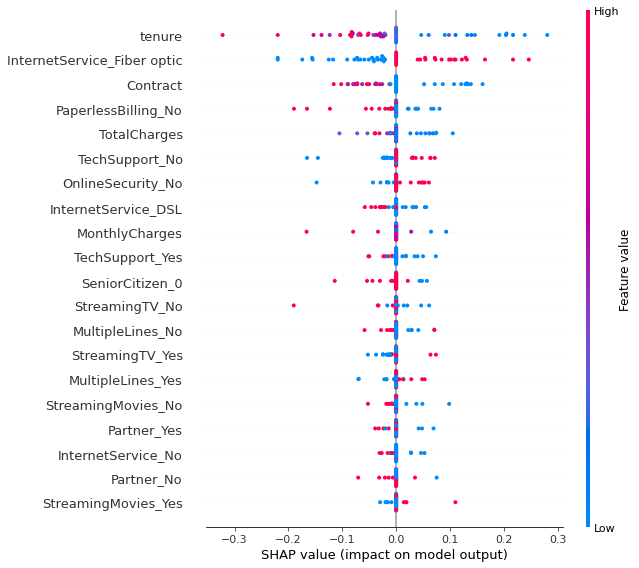

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()
shap.summary_plot(shap_values = shap_values,
                  features = X_test_encoded.iloc[0:50,:]
                  )